In [1]:
%pylab inline
import sympy
sympy.init_printing()

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_complex_function(Y, sigma_min, sigma_max, omega_max, log_omega, plot_conj):
    sigma_eval=np.linspace(sigma_min, sigma_max, 200)
    
    # constants
    omega_min = 1e-3
    nlevels = 20  # levels of contour
    nlevels_outline = 10  # levels of contour

    # validate input
    assert np.all(omega_max > 0)
    
    # symbolic function
    sigma, omega = sympy.symbols('sigma, omega', real=True, positive=True)
    s_binomial = sigma + sympy.I*omega
    Y_arg = sympy.arg(Y.subs(s, s_binomial))
    Y_mag = sympy.Abs(Y.subs(s, s_binomial))
    f_Y_euler = sympy.lambdify((sigma, omega), (Y_arg, Y_mag))
    
    # compute poles and zeros
    poles = sympy.solve(sympy.denom(Y))
    zeros = sympy.solve(sympy.numer(Y))
    re_poles = np.array(np.real(poles), dtype=np.float)
    im_poles = np.array(np.imag(poles), dtype=np.float)
    re_zeros = np.array(np.real(zeros), dtype=np.float)
    im_zeros = np.array(np.imag(zeros), dtype=np.float)

    # evaluate
    if log_omega:
        omega_eval=np.logspace(np.log10(omega_min), np.log10(omega_max), 200)
        yplot = plt.semilogy
        xplot = plt.semilogx
        im_zeros = np.where(im_zeros < omega_min, omega_min, im_zeros)
        im_poles = np.where(im_poles < omega_min, omega_min, im_poles)
    else:
        omega_eval=np.linspace(omega_min, omega_max, 100)
        omega_both = np.concatenate([-np.flip(omega_eval), omega_eval])
        yplot = plt.plot
        xplot = plt.plot
    
    if plot_conj and not log_omega:
        Sigma, Omega = np.meshgrid(sigma_eval, omega_both)
    else:
        Sigma, Omega = np.meshgrid(sigma_eval, omega_eval)

    Z = f_Y_euler(Sigma, Omega)
    angle = np.rad2deg(Z[0])
    mag = 20*np.log10(np.abs(Z[1]))
    
    # angle G(jw)
    Z_jw = f_Y_euler(0, omega_eval)
    angle_jw = np.rad2deg(Z_jw[0])
    mag_jw = 20*np.log10(np.abs(Z_jw[1]))
    
    # figures
    fig = plt.figure(figsize=(20, 10))
    
    # angle of G(S)
    ax = plt.subplot(221)
    CS = ax.contourf(Sigma, Omega, angle, nlevels,cmap=plt.cm.hsv)
    cbar = plt.colorbar(CS)
    CS = ax.contour(Sigma, Omega, angle, nlevels_outline, colors='k', linestyles='--')
    cbar.add_lines(CS)
    ax.set_title(r'$\angle G(s),\ deg$');
    ax.set_xlabel(r'$\sigma$')
    ax.set_ylabel(r'$\omega,\ rad/s$')
    pole_props = {'marker':'x', 'color':'white', 'markeredgewidth':3, 'markersize':20, 'markerfacecolor':'none'}
    zero_props = {'marker':'o', 'color':'white', 'markeredgewidth':3, 'markersize':20, 'markerfacecolor':'none'}
    h_pole = yplot(re_poles, im_poles, **pole_props)
    h_zero = yplot(re_zeros, im_zeros, **zero_props)
    h_jw = yplot(0*omega_eval, omega_eval, 'g-', linewidth=5, alpha=0.5)
    plt.legend([h_zero[0], h_pole[0], h_jw[0]], ['zero', 'pole', 'jw'], loc='best', ncol=3)
    plt.grid()
    
    # mag of G(S)
    ax = plt.subplot(222)
    CS2 = ax.contourf(Sigma, Omega, mag, nlevels, cmap=plt.cm.coolwarm)
    cbar = plt.colorbar(CS2)
    CS2 = ax.contour(Sigma, Omega, mag, nlevels_outline, colors='k', linestyles='--')
    cbar.add_lines(CS2)
    ax.set_title(r'$|G(s)|,\ dB$');
    ax.set_xlabel(r'$\sigma$')
    ax.set_ylabel(r'$\omega,\ rad/s$')
    h_pole = yplot(re_poles, im_poles, **pole_props)
    h_zero = yplot(re_zeros, im_zeros, **zero_props)
    h_jw = yplot(0*omega_eval, omega_eval, 'g-', linewidth=5, alpha=0.5)
    plt.legend([h_zero[0], h_pole[0], h_jw[0]], ['zero', 'pole', 'jw'], loc='best', ncol=3)
    plt.grid()
    
    # magnitude of G(jw)
    ax = plt.subplot(223)
    ax.set_title(r'$\angle G(j\omega),\ deg$');
    ax.set_xlabel(r'$\omega,\ rad/s$')
    xplot(omega_eval, angle_jw)
    xplot(omega_eval, angle_jw)
    ax.set_ylabel(r'$\angle G(j\omega),\ deg$');
    plt.grid()

    ax = plt.subplot(224)
    ax.set_title(r'$|G(j\omega)|,\ dB$');
    ax.set_xlabel(r'$\omega,\ rad/s$')
    xplot(omega_eval, mag_jw)
    xplot(omega_eval, mag_jw)
    ax.set_ylabel(r'$|G(j\omega)|,\ dB$');
    plt.grid()

In [8]:
t, sigma, omega = sympy.symbols('t, sigma, omega')
s = sympy.symbols('s', complex=True)

Y = s/(s+1)

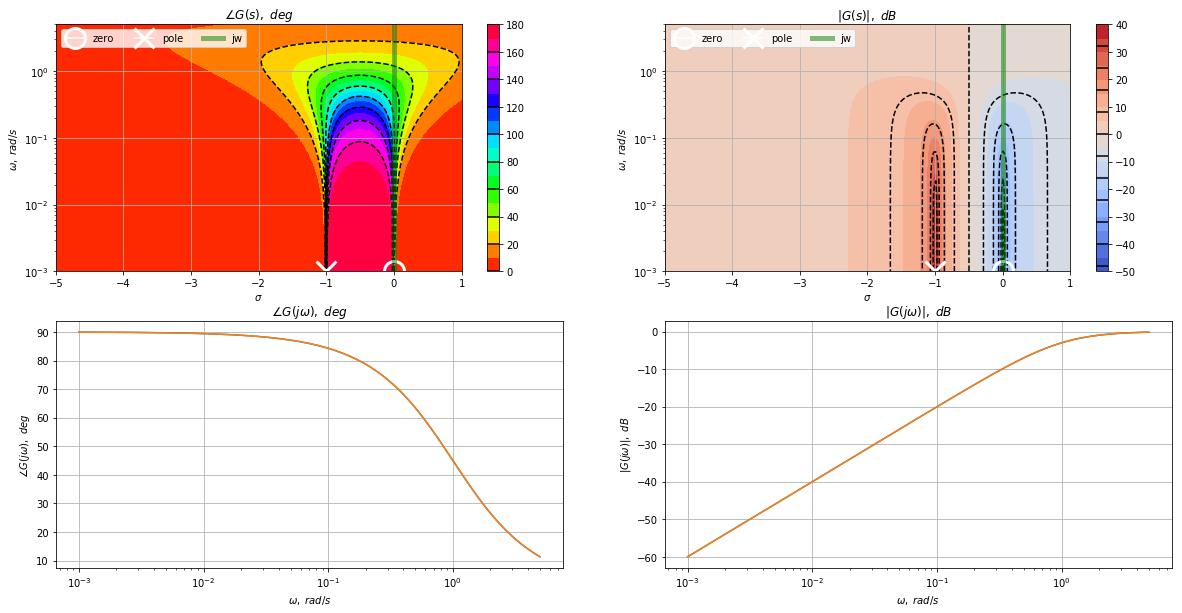

In [10]:
plot_complex_function(Y, sigma_min=-5, sigma_max=1, omega_max=5, log_omega=True, plot_conj=True)